In [20]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data

INFO: Downloading ['all'] to /tmp\sound_datasets\urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
INFO: /tmp\sound_datasets\urbansound8k\UrbanSound8K.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: /tmp\sound_datasets\urbansound8k\audio already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\sound_datasets\urbansound8k\FREESOUNDCREDITS.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\sound_datasets\urbansound8k\metadata already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\sound_datasets\urbansound8k\UrbanSound8K_README.txt already exists. Run with force_overwrite=True to download from scratch
100%|██████████| 8732/8732 [02:12<00:00, 65.83it/s]
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


Clip(
  audio_path="/tmp\sound_datasets\urbansound8k\audio/fold1/98223-7-3-0.wav",
  clip_id="98223-7-3-0",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_time: The 

In [6]:
soundata.DATASETS

['eigenscape',
 'eigenscape_raw',
 'esc50',
 'fsd50k',
 'fsdnoisy18k',
 'marco',
 'singapura',
 'starss2022',
 'tau2019sse',
 'tau2019uas',
 'tau2020sse_nigens',
 'tau2020uas_mobile',
 'tau2021sse_nigens',
 'tut2017se',
 'urbansed',
 'urbansound8k']

In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import soundfile
from scipy import signal
import IPython.display as ipd
import librosa, librosa.display

In [22]:
path = dataset.default_path

classes = {
    0 : 'air_conditioner',
    1 : 'car_horn',
    2 : 'children_playing',
    3 : 'dog_bark',
    4 : 'drilling',
    5 : 'engine_idling',
    6 : 'gun_shot',
    7 : 'jackhammer',
    8 : 'siren',
    9 : 'street_music'
}

<h1>Functions</h1>

### Plot audio wave function

In [24]:
def plot_wave(clip):
    plt.figure(1)
    plt.title(clip.class_label)
    plt.plot(clip.audio[0])
    plt.show()

### Plot FFT function

In [25]:
def plot_fft(clip):
    fft_data = np.fft.fft(clip.audio[0])
    magnitude = np.abs(fft_data[:len(fft_data)//2])
    sample_rate = clip.audio[1]
    frequency = np.fft.fftfreq(len(fft_data), 1.0 / sample_rate)[:len(fft_data)//2]

    plt.plot(frequency, magnitude)
    plt.title('FFT of'+ clip.class_label)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()


### Plot spectogram function

In [6]:
def plot_spectogram(spectogram,sr,hop_lenght,class_label):
    librosa.display.specshow(spectogram, sr=sr,hop_length=hop_lenght)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title("Spectogram for class: "+ class_label)
    plt.colorbar()
    plt.show()


### Calculate spectogram function

In [7]:
def calculate_spectogram(clip, n_fft = 2048, hop_lenght = 512):
    stft = librosa.core.stft(clip.audio[0], n_fft=n_fft,hop_length=hop_lenght)
    spectogram = np.abs(stft)
    return spectogram

### Plot MFCCs

In [8]:
def plot_mfccs(mfccs,sr,hop_lenght,class_label):
    librosa.display.specshow(mfccs, sr=sr,hop_length=hop_lenght)
    plt.xlabel("Time")
    plt.ylabel("MFCCs")
    plt.title("MFCCs for class: "+ class_label)
    plt.colorbar()
    plt.show()

### Visualization

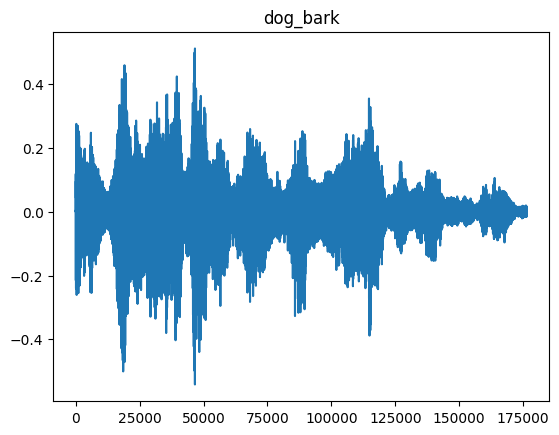

In [41]:
example_clip = dataset.choice_clip()
plot_wave(example_clip)

In [42]:
ipd.Audio(data=example_clip.audio[0],rate=example_clip.audio[1])

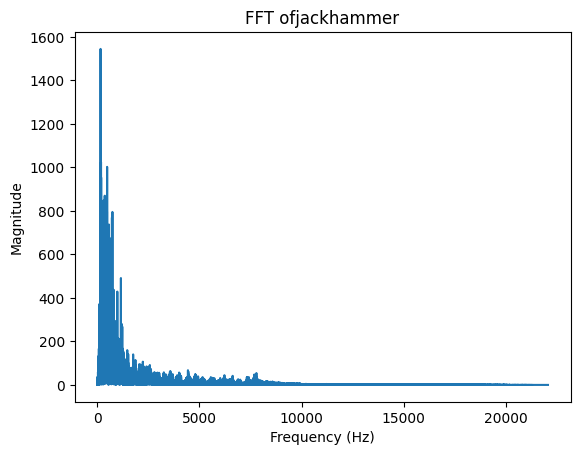

In [148]:
plot_fft(example_clip)

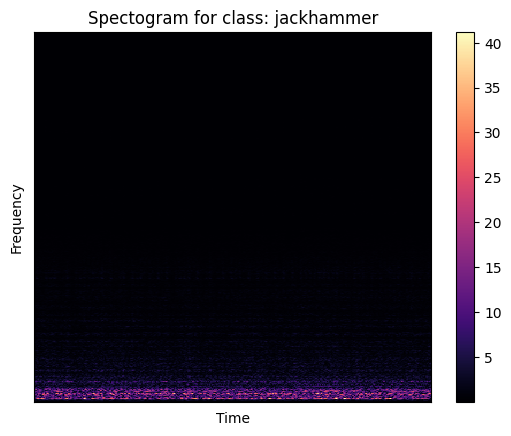

In [149]:
n_fft = 2048
hop_length=512
spectogram = calculate_spectogram(example_clip)
plot_spectogram(spectogram=spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

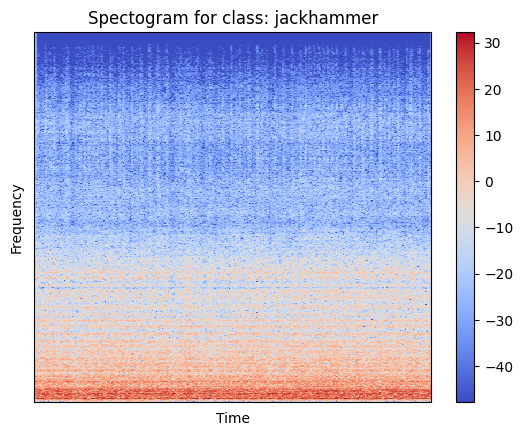

In [150]:
log_spectogram = librosa.amplitude_to_db(spectogram)
plot_spectogram(spectogram=log_spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

C:\Users\there\AppData\Local\Temp\ipykernel_37584\1090810863.py:1: FutureWarning: Pass y=[-0.12356567 -0.11566162 -0.09973145 ... -0.0440979  -0.0569458
 -0.05426025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(example_clip.audio[0],n_fft = n_fft, hop_length=hop_length,n_mfcc=20)


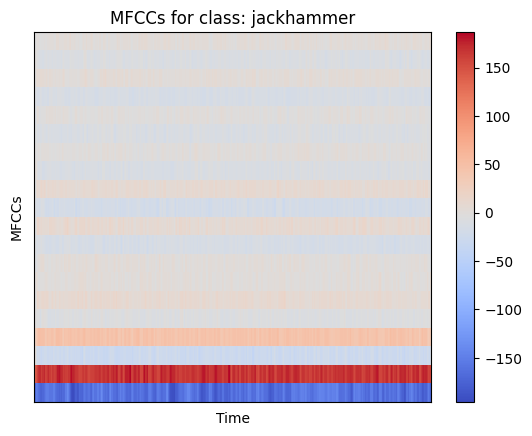

In [151]:
mfccs = librosa.feature.mfcc(example_clip.audio[0],n_fft = n_fft, hop_length=hop_length,n_mfcc=20)
plot_mfccs(mfccs=mfccs, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

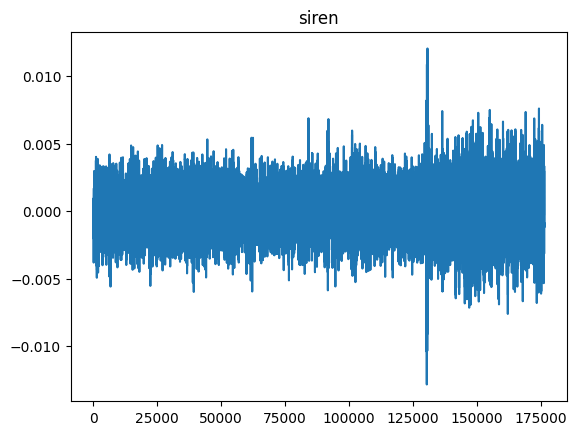

In [152]:
example_clip = dataset.choice_clip()
plot_wave(example_clip)

In [153]:
ipd.Audio(data=example_clip.audio[0],rate=example_clip.audio[1])

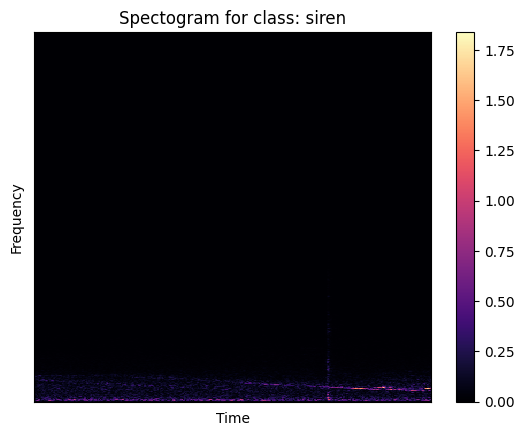

In [154]:
spectogram = calculate_spectogram(example_clip)
plot_spectogram(spectogram=spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

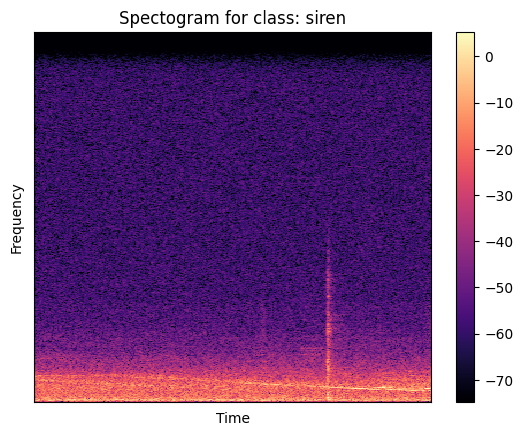

In [155]:
log_spectogram = librosa.amplitude_to_db(spectogram)
plot_spectogram(spectogram=log_spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

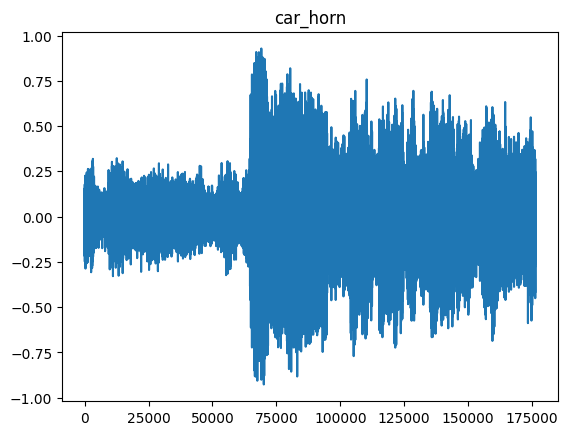

In [156]:
example_clip = dataset.choice_clip()
plot_wave(example_clip)

In [157]:
ipd.Audio(data=example_clip.audio[0],rate=example_clip.audio[1])

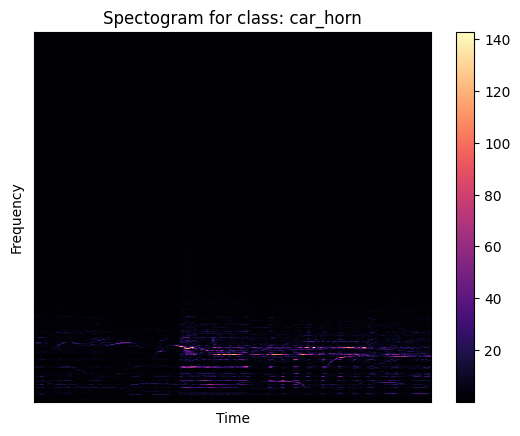

In [158]:
spectogram = calculate_spectogram(example_clip)
plot_spectogram(spectogram=spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

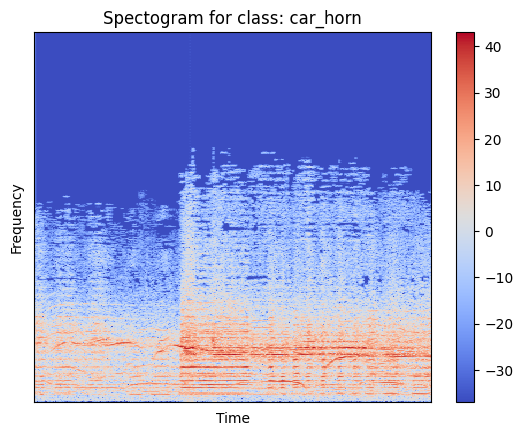

In [159]:
log_spectogram = librosa.amplitude_to_db(spectogram)
plot_spectogram(spectogram=log_spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

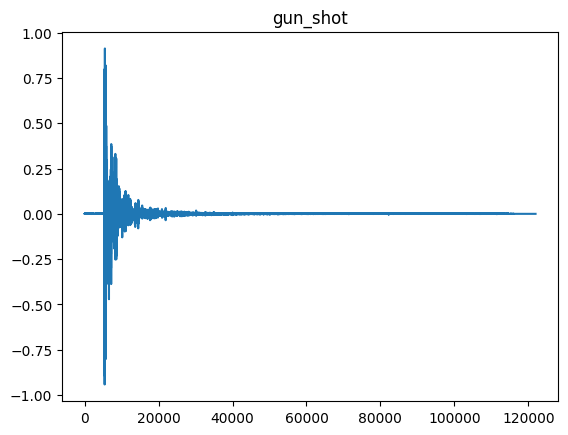

In [172]:
example_clip = dataset.choice_clip()
plot_wave(example_clip)

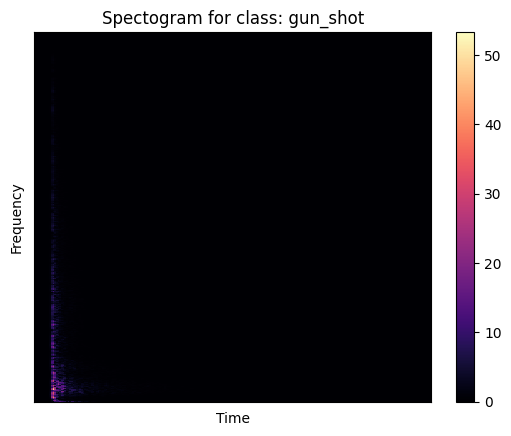

In [173]:
spectogram = calculate_spectogram(example_clip)
plot_spectogram(spectogram=spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

In [174]:
ipd.Audio(data=example_clip.audio[0],rate=example_clip.audio[1])

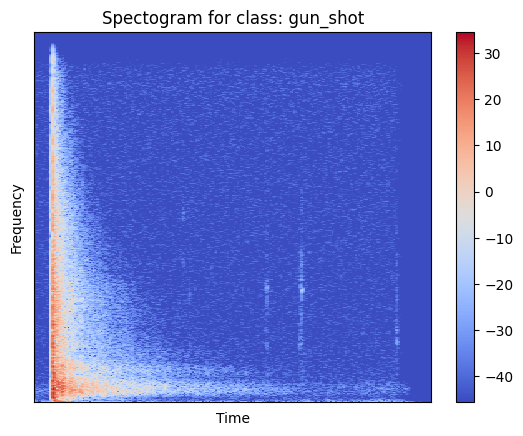

In [175]:
log_spectogram = librosa.amplitude_to_db(spectogram)
plot_spectogram(spectogram=log_spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

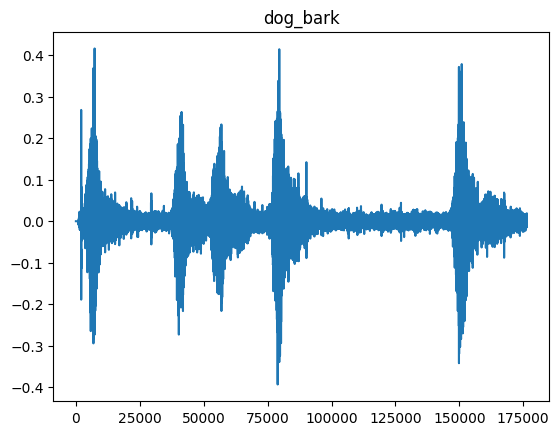

In [197]:
example_clip = dataset.choice_clip()
plot_wave(example_clip)

In [198]:
ipd.Audio(data=example_clip.audio[0],rate=example_clip.audio[1])

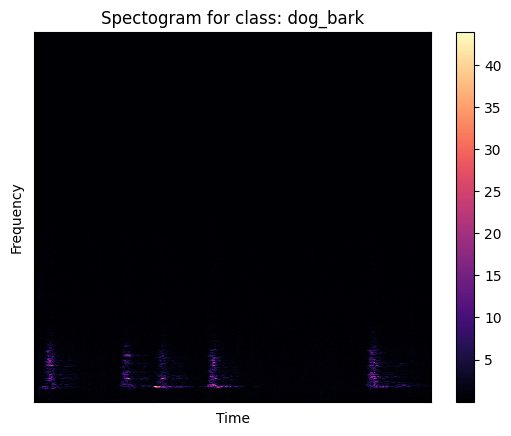

In [199]:
spectogram = calculate_spectogram(example_clip)
plot_spectogram(spectogram=spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

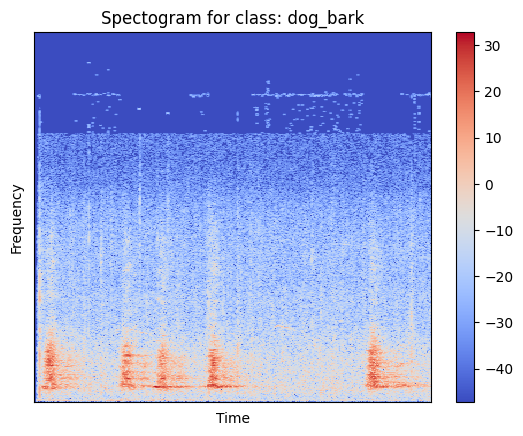

In [200]:
log_spectogram = librosa.amplitude_to_db(spectogram)
plot_spectogram(spectogram=log_spectogram, sr=example_clip.audio[1],hop_lenght=hop_length,class_label=example_clip.class_label)

### Data Preprocessing

10-Fold Preparation

In [50]:
import glob
import os
from sklearn.model_selection import KFold

num_folds = 10

data_paths = glob.glob('/tmp/sound_datasets/urbansound8k/audio/fold*/**/*.wav', recursive=True)

labels = [int(os.path.basename(path).split('-')[1]) for path in data_paths]
folds = [int(os.path.basename(path).split('-')[2]) for path in data_paths]

kf = KFold(n_splits=num_folds, shuffle=False)

for train_index, test_index in kf.split(data_paths):
    train_data = [data_paths[i] for i in train_index]
    test_data = [data_paths[i] for i in test_index]


Data processing - calculating MFCCs and storing as JSON

In [53]:

audio_data = dataset.load_clips()
import json 

train_data = {
    "mels":[],
    "labels":[]
}

test_data = {
    "mels":[],
    "labels":[]
}
val_data = {
    "mels":[],
    "labels":[]
}
fold_test = "fold10"
fold_vali = "fold9"

for clip in audio_data:
    single_audio = audio_data[clip]
    audio_path = single_audio.audio_path
    audio, sample_rate = single_audio.audio
    mels = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mels = librosa.power_to_db(mels, ref=np.max).tolist() 
    label = clip.split("-")[1]
    if fold_test in audio_path:
        test_data["labels"].append(label)
        test_data["mels"].append(mels)
    elif fold_vali in audio_path:
        train_data["labels"].append(label)
        train_data["mels"].append(mels)
    else:
        val_data["labels"].append(label)
        val_data["mels"].append(mels)

with open("train.json", "w") as outfile: 
    json.dump(train_data, outfile)
with open("test.json", "w") as outfile: 
    json.dump(test_data, outfile)
with open("validation.json", "w") as outfile: 
    json.dump(val_data, outfile)

In [6]:
import json 

def load_data():
    with open("train.json", "r") as infile:
        train_data = json.load(infile)

    with open("test.json", "r") as infile:
        test_data = json.load(infile)

    with open("validation.json", "r") as infile:
        validation_data = json.load(infile)

    X_val = np.array(validation_data["mels"])
    y_val = np.array(validation_data["labels"])

    X_train = np.array(train_data["mels"])
    y_train = np.array(train_data["labels"])

    X_test = np.array(test_data["mels"])
    y_test = np.array(test_data["labels"])


    return X_train, y_train, X_val, y_val, X_test, y_test

In [136]:
"fold7" in example_clip.audio_path 

True

In [49]:
import desed
desed.download_real("./data/dataset")
desed.download_desed_soundbank("./data/soundbank")



[==================================================]

[==================================================]

INFO - desed.download/download_audioset_data - Downloading Weakly labeled data...


INFO: Downloading Weakly labeled data...


INFO - desed.download/download_audioset_files_from_csv - downloading data from: ./data/dataset\metadata\train\weak.tsv


INFO: downloading data from: ./data/dataset\metadata\train\weak.tsv
100%|██████████| 1578/1578 [14:54<00:00,  1.76it/s]

INFO - desed.download/download_audioset_files_from_csv - ###### DONE #######



INFO: ###### DONE #######


INFO - desed.download/download_audioset_data - Downloading Unlabeled (in_domain) labeled data...


INFO: Downloading Unlabeled (in_domain) labeled data...


INFO - desed.download/download_audioset_files_from_csv - downloading data from: ./data/dataset\metadata\train\unlabel_in_domain.tsv


INFO: downloading data from: ./data/dataset\metadata\train\unlabel_in_domain.tsv
 37%|███▋      | 5360/14412 [49:33<1:23:42,  1.80it/s]


KeyboardInterrupt: 

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn(input_shape, num_classes, num_conv_layers, num_filters, filter_size, num_dense_layers, num_dense_units, 
               optimizer='adam', learning_rate=0.001, dropout_rate_conv=0.0, dropout_rate_dense=0.0):
    """
    Create a CNN with variable parameters.

    Parameters:
    - input_shape: Tuple, the shape of the input data (e.g., (height, width, channels)).
    - num_classes: int, the number of output classes.
    - num_conv_layers: int, the number of convolutional layers.
    - num_filters: int or List[int], the number of filters for each convolutional layer.
    - filter_size: int or List[int], the size of filters for each convolutional layer.
    - num_dense_layers: int, the number of dense (fully connected) layers.
    - num_dense_units: int or List[int], the number of units for each dense layer.
    - optimizer: str or tf.keras.optimizers.Optimizer, the optimizer to use (default is 'adam').
    - learning_rate: float, the learning rate for the optimizer (default is 0.001).
    - dropout_rate_conv: float, the dropout rate for convolutional layers (default is 0.0).
    - dropout_rate_dense: float, the dropout rate for dense layers (default is 0.0).

    Returns:
    - model: a Keras model.
    """
    model = models.Sequential()

    # Add convolutional layers
    if isinstance(num_filters, list):
        assert len(num_filters) == num_conv_layers, "Number of filters should match the number of convolutional layers"
    else:
        num_filters = [num_filters] * num_conv_layers

    if isinstance(filter_size, list):
        assert len(filter_size) == num_conv_layers, "Filter sizes should match the number of convolutional layers"
    else:
        filter_size = [filter_size] * num_conv_layers

    for i in range(num_conv_layers):
        model.add(layers.Conv2D(num_filters[i], (filter_size[i], filter_size[i]), activation='relu', input_shape=input_shape))
        model.add(layers.MaxPooling2D((2, 2)))
        if dropout_rate_conv > 0.0:
            model.add(layers.Dropout(dropout_rate_conv))

    # Flatten the output before dense layers
    model.add(layers.Flatten())

    # Add dense layers
    if isinstance(num_dense_units, list):
        assert len(num_dense_units) == num_dense_layers, "Number of units should match the number of dense layers"
    else:
        num_dense_units = [num_dense_units] * num_dense_layers

    for i in range(num_dense_layers):
        model.add(layers.Dense(num_dense_units[i], activation='relu'))
        if dropout_rate_dense > 0.0:
            model.add(layers.Dropout(dropout_rate_dense))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model with optimizer and learning rate
    if isinstance(optimizer, str):
        optimizer = tf.keras.optimizers.get(optimizer)
    
    optimizer.learning_rate = learning_rate

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage:
from config import input_shape,num_classes,num_conv_layers, num_filters, filter_size, num_dense_layers, num_dense_units, optimizer, learning_rate, dropout_rate_conv, dropout_rate_dense

cnn_model = create_cnn(input_shape, num_classes, num_conv_layers, num_filters, filter_size, num_dense_layers, num_dense_units, optimizer, learning_rate, dropout_rate_conv, dropout_rate_dense)

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

X_train, y_train, X_val, y_val, X_test, y_test = load_data()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

C:\Users\there\AppData\Local\Temp\ipykernel_3720\1526637818.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_val = np.array(validation_data["mels"])
C:\Users\there\AppData\Local\Temp\ipykernel_3720\1526637818.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(train_data["mels"])
C:\Users\there\AppData\Local\Temp\ipykernel_3720\1526637818.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [35]:
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),verbose=1)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [37]:
[print(i.shape, i.dtype) for i in cnn_model.inputs]
X_train = np.asarray(X_train).astype(np.float32)


(None, 64, 64, 3) <dtype: 'float32'>


ValueError: setting an array element with a sequence.

In [38]:
X_train[0].shape

(128,)

In [30]:
res = X_train

In [32]:
X_train2 = []
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        X_train[i][j]= np.array(X_train[i][j])
X_train[0]

array([array([-24.66016769, -21.39741516, -23.6925106 , -32.3032608 ,
              -26.42490387, -24.50842285, -26.18344498, -26.8622551 ,
              -25.95729065, -27.54101372, -26.93637848, -22.23318863,
              -24.02033997, -27.75820923, -24.64499474, -22.09516907,
              -24.63510704, -24.55433273, -20.70513344, -22.26726341,
              -28.13525963, -22.67252731, -22.53833771, -30.53124809,
              -24.29607773, -20.8013649 , -23.74291039, -23.4255619 ,
              -20.0698967 , -21.49430084, -22.25349236, -19.33138275,
              -20.06610107, -23.41193581, -22.0592308 , -20.05417824,
              -28.23943901, -23.96068573, -18.63180542, -19.9404068 ,
              -20.31973648, -17.03817749, -18.86066437, -20.29635048,
              -20.184515  , -17.63883209, -24.73923683, -25.6392746 ,
              -20.91617393, -25.13417625, -24.90038681, -19.69379425,
              -18.98700714, -24.16511536, -24.16064835, -23.89437485,
              -27.74

In [34]:
X_train.shape

(816, 128)